In [1]:
# Thu Vien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import statistics
from recommenders.utils.timer import Timer
from recommenders.datasets import movielens
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\pandera\_pandas_deprecated.py:157: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


In [5]:
import pandas as pd

# Đọc file u.data
df = pd.read_csv(
    r'D:\CT294\CT294project\models\ml-100k\ml-100k\u.data',   # Đường dẫn tới file u.data
    sep='\t',           # File tách bằng tab
    names=["userId", "movieId", "rating", "timestamp"],
    engine='python'
)

# Chỉ lấy 3 cột cần thiết
df = df[["userId", "movieId", "rating"]]

print(df.head())

# # Load du lieu movieLens 100k
# df = movielens.load_pandas_df(
#     size="100k",
#     header=["userId", "movieId", "rating", "timestamp"]
# )
# df = df[["userId", "movieId", "rating"]] # Chon 3 cot userId, movieId, rating
# df.head()

   userId  movieId  rating
0     196      242       3
1     186      302       3
2      22      377       1
3     244       51       2
4     166      346       1


In [6]:
# Encode userId và movieId
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df["userId_enc"] = user_enc.fit_transform(df["userId"])
df["movieId_enc"] = item_enc.fit_transform(df["movieId"])

In [7]:
# Xáo trộn dữ liệu
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
#Chuẩn bị dữ liệu X và y
X = df[['userId_enc', 'movieId_enc']]
y = df['rating']

In [9]:
# Chuẩn hóa dữ liệu
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
df_standard = pd.DataFrame(X_standard, columns=["userId_enc", "movieId_enc"])
print("\nDu lieu sau khi chuan hoa Z-score:")
print(df_standard.head())


Du lieu sau khi chuan hoa Z-score:
   userId_enc  movieId_enc
0    1.554745    -0.134615
1    1.322198     0.533469
2   -1.382096     0.016535
3   -0.174353     1.358750
4    0.140710    -0.736193


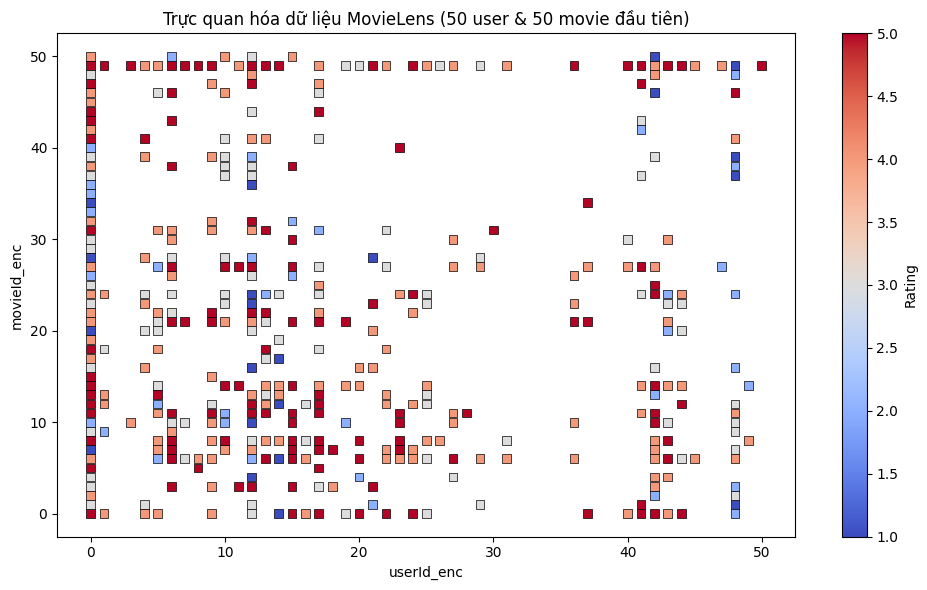

In [11]:
import matplotlib.pyplot as plt

# Lọc dữ liệu: chỉ lấy 50 userId_enc và 50 movieId_enc đầu tiên
filtered_df = df[
    (df['userId_enc'] <= 50) &
    (df['movieId_enc'] <= 50)
]

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['userId_enc'], filtered_df['movieId_enc'],
            c=filtered_df['rating'], cmap='coolwarm', s=40, marker='s', edgecolors='black',
    linewidths=0.5)
plt.colorbar(label='Rating')
plt.title("Trực quan hóa dữ liệu MovieLens (50 user & 50 movie đầu tiên)")
plt.xlabel("userId_enc")
plt.ylabel("movieId_enc")
plt.tight_layout()
plt.show()


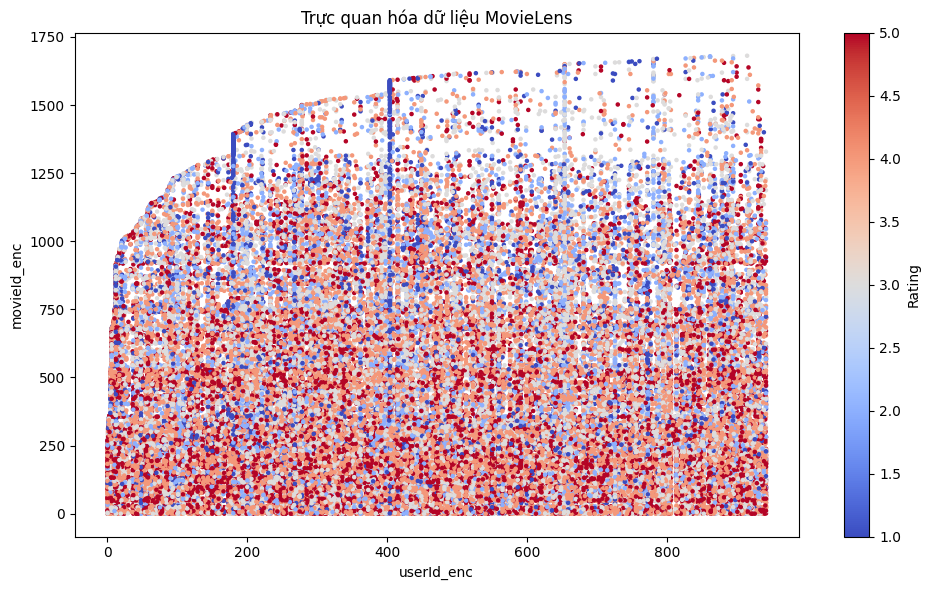

In [12]:
# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 6))
plt.scatter(df['userId_enc'], df['movieId_enc'], c=df['rating'], cmap='coolwarm', s=5)
plt.colorbar(label='Rating')
plt.title("Trực quan hóa dữ liệu MovieLens")
plt.xlabel("userId_enc")
plt.ylabel("movieId_enc")
plt.tight_layout()
plt.show()



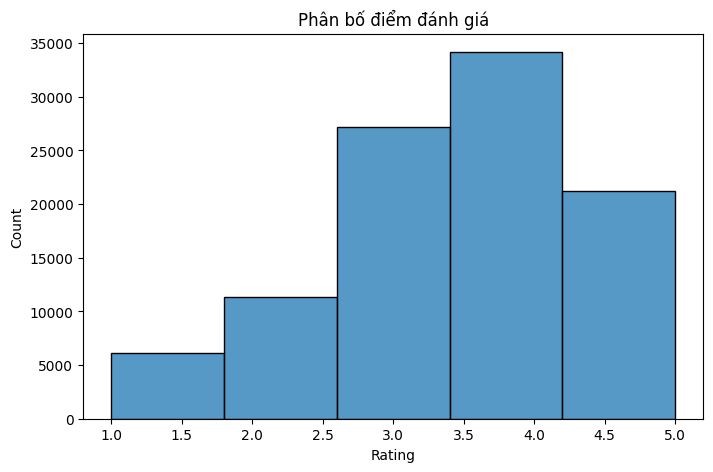

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ phân bố điểm đánh giá
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=False)  # bins=5 vì rating 1-5
plt.title("Phân bố điểm đánh giá")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [14]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Huấn luyện mô hình
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")

MAE  = 0.9014
MSE  = 1.2802
RMSE = 1.1315


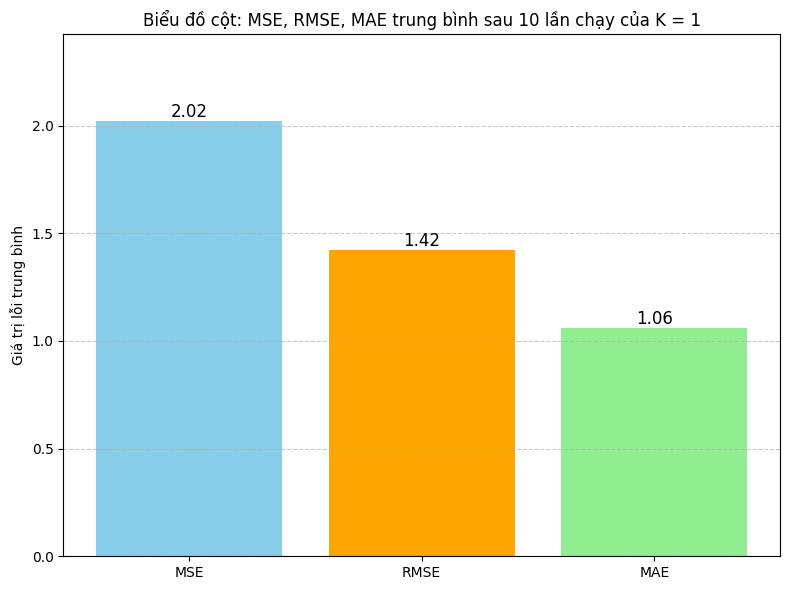

k = 1
Train Time: 0.2644017696380615
Test Time: 0.30697534084320066
Trung binh: RMSE = 1.4212 | MAE = 1.0599 | MSE = 2.0197


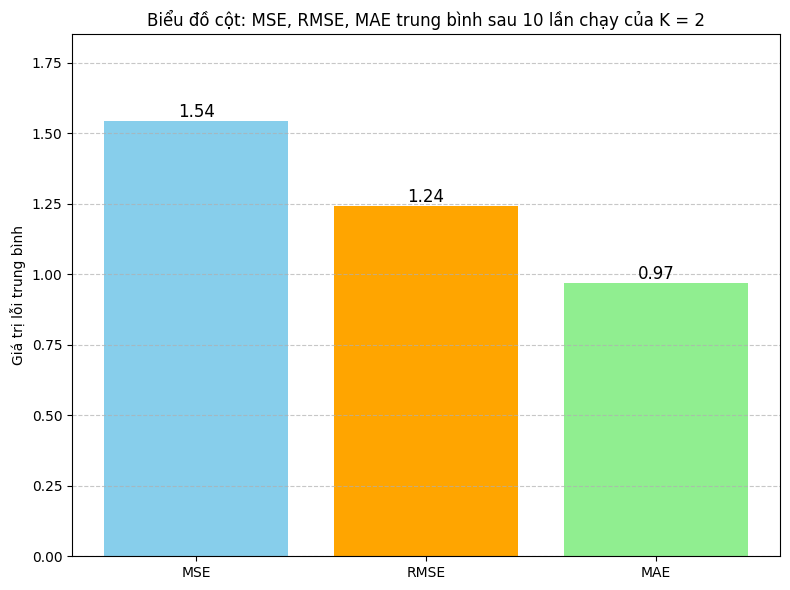

k = 2
Train Time: 0.2119061231613159
Test Time: 0.28176820278167725
Trung binh: RMSE = 1.2417 | MAE = 0.9674 | MSE = 1.5418


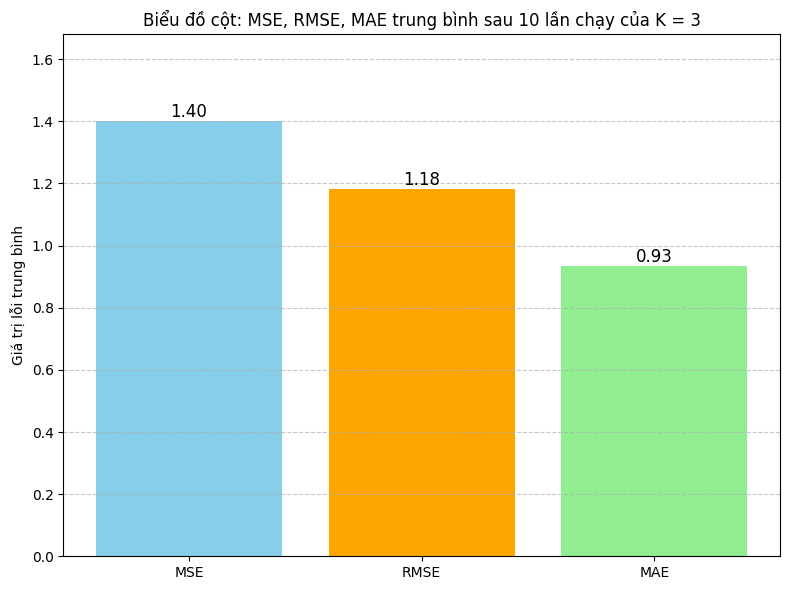

k = 3
Train Time: 0.4012169361114502
Test Time: 0.5443594217300415
Trung binh: RMSE = 1.1831 | MAE = 0.9348 | MSE = 1.3998


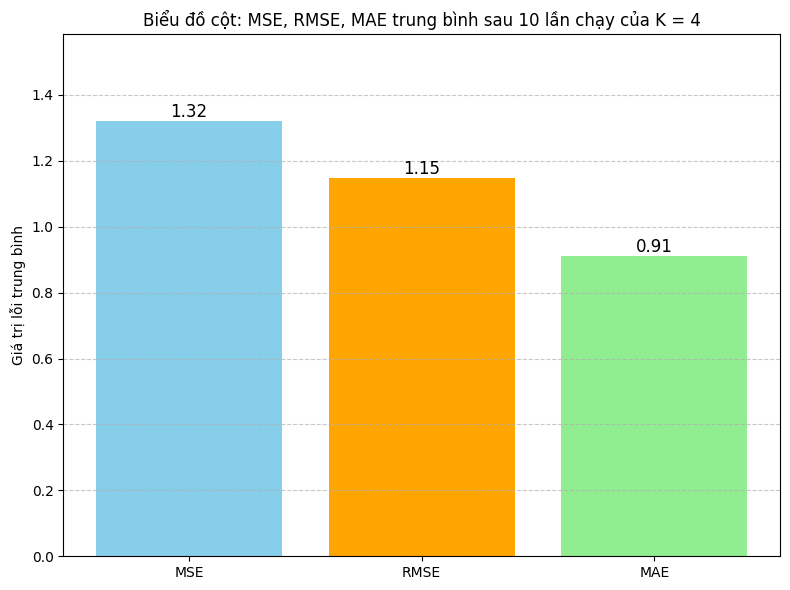

k = 4
Train Time: 0.16974332332611083
Test Time: 0.21291155815124513
Trung binh: RMSE = 1.1488 | MAE = 0.9124 | MSE = 1.3197


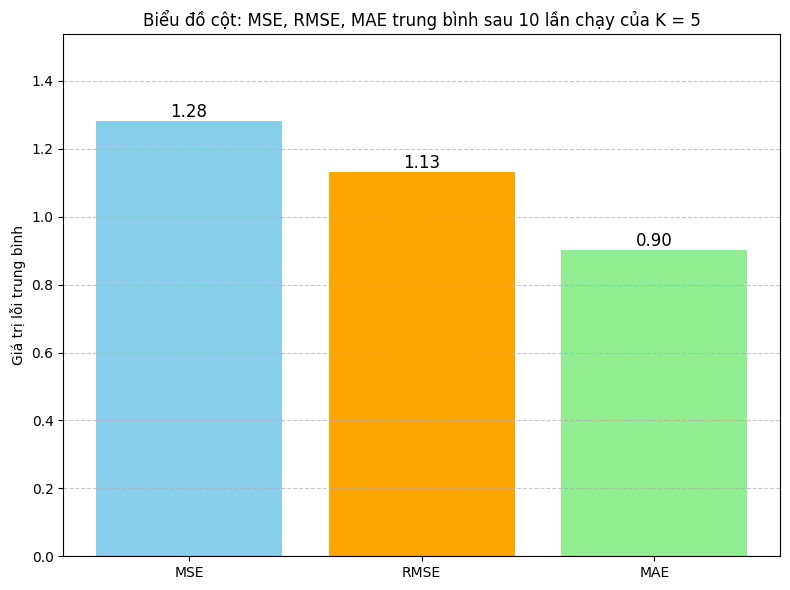

k = 5
Train Time: 0.1524874448776245
Test Time: 0.27067112922668457
Trung binh: RMSE = 1.1318 | MAE = 0.9023 | MSE = 1.2809


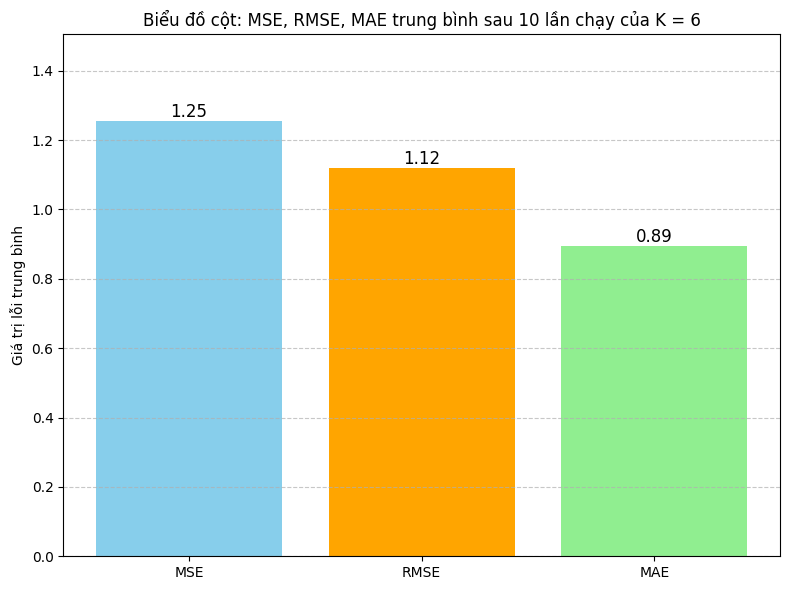

k = 6
Train Time: 0.3832794904708862
Test Time: 0.6013476371765136
Trung binh: RMSE = 1.1197 | MAE = 0.8938 | MSE = 1.2538


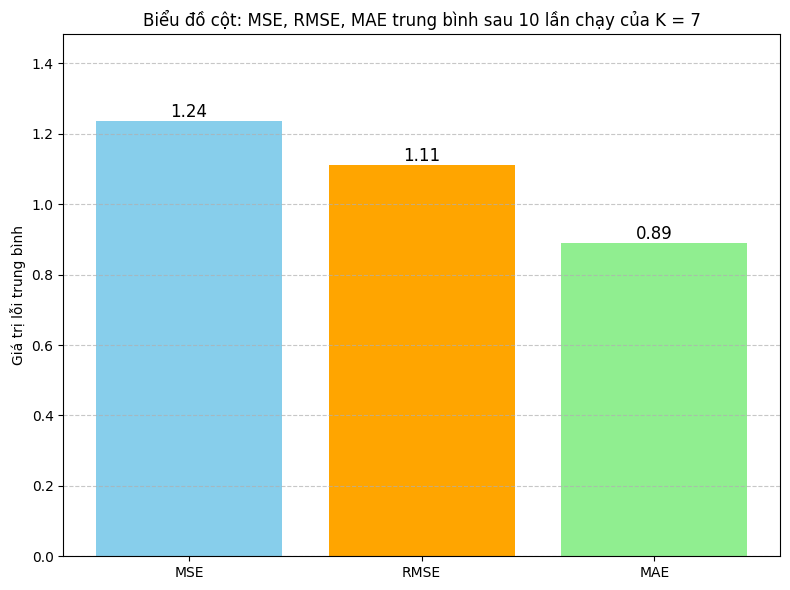

k = 7
Train Time: 0.08786294460296631
Test Time: 0.12270131111145019
Trung binh: RMSE = 1.1114 | MAE = 0.8893 | MSE = 1.2353


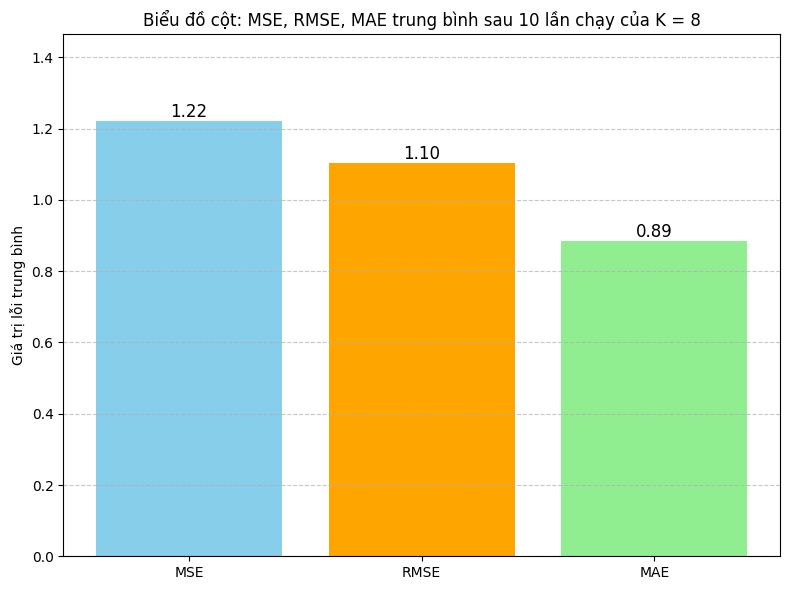

k = 8
Train Time: 0.09246482849121093
Test Time: 0.1514141082763672
Trung binh: RMSE = 1.1047 | MAE = 0.8852 | MSE = 1.2203


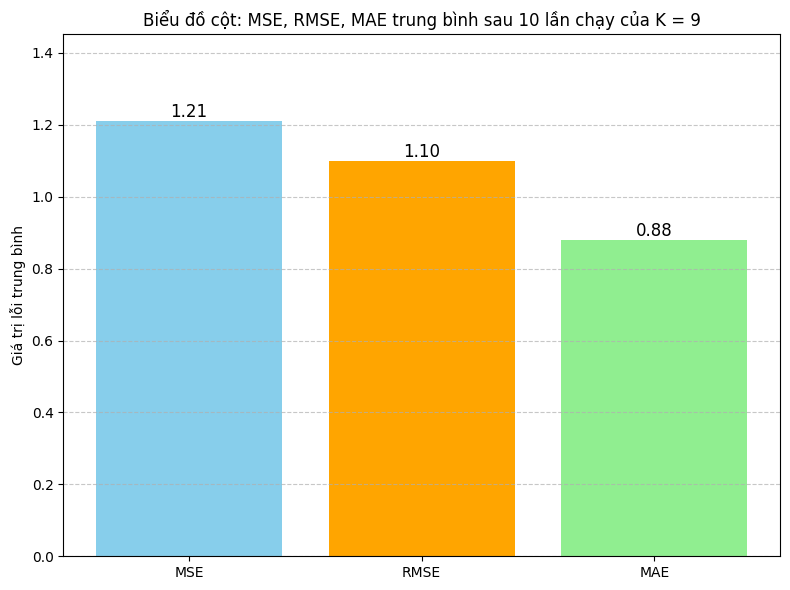

k = 9
Train Time: 0.09257087707519532
Test Time: 0.14181392192840575
Trung binh: RMSE = 1.0998 | MAE = 0.8810 | MSE = 1.2095


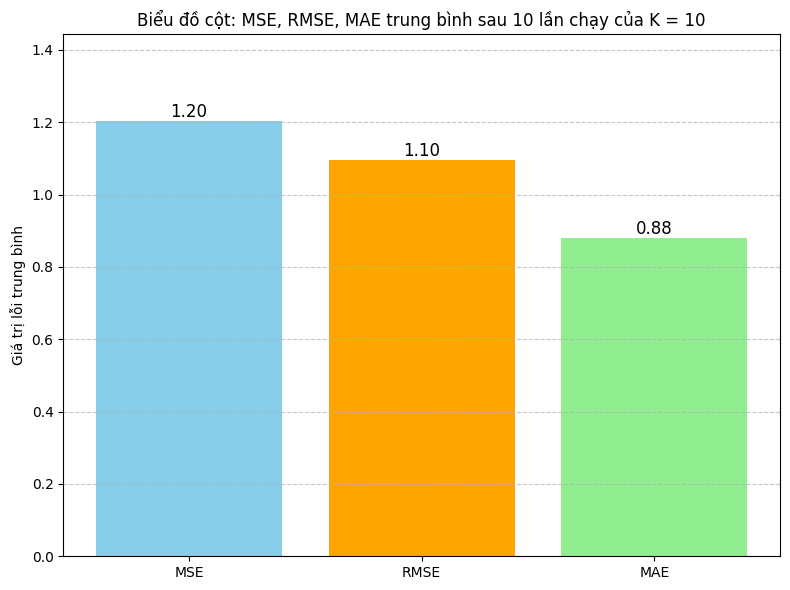

k = 10
Train Time: 0.07997019290924072
Test Time: 0.11403458118438721
Trung binh: RMSE = 1.0965 | MAE = 0.8801 | MSE = 1.2023


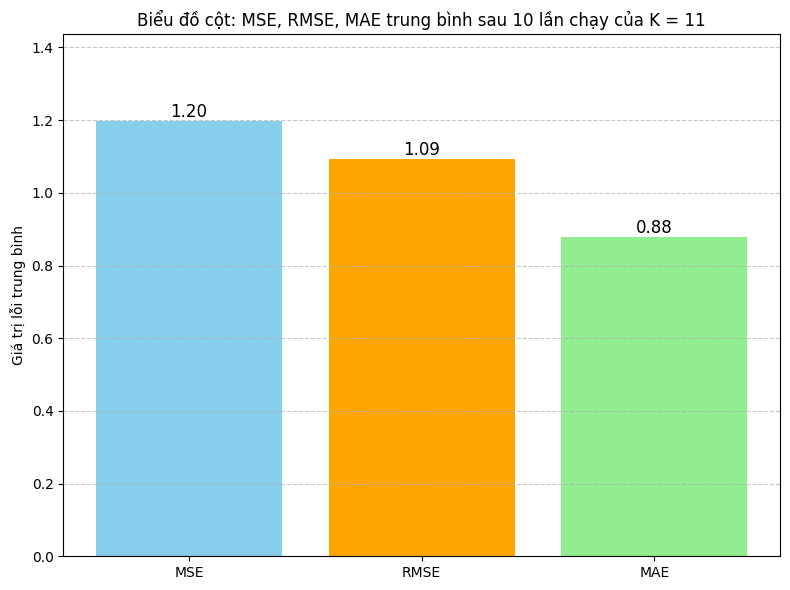

k = 11
Train Time: 0.0932724952697754
Test Time: 0.16386265754699708
Trung binh: RMSE = 1.0939 | MAE = 0.8782 | MSE = 1.1966


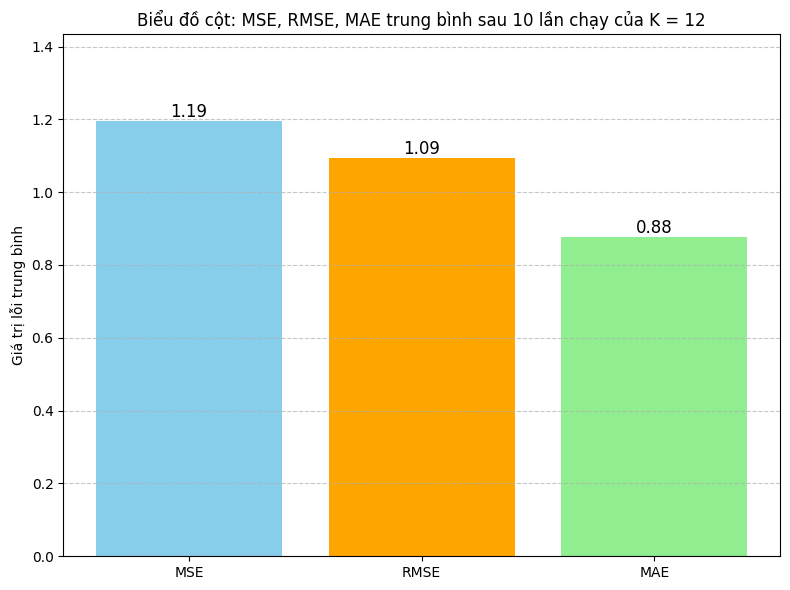

k = 12
Train Time: 0.15922107696533203
Test Time: 0.2913645029067993
Trung binh: RMSE = 1.0929 | MAE = 0.8781 | MSE = 1.1944


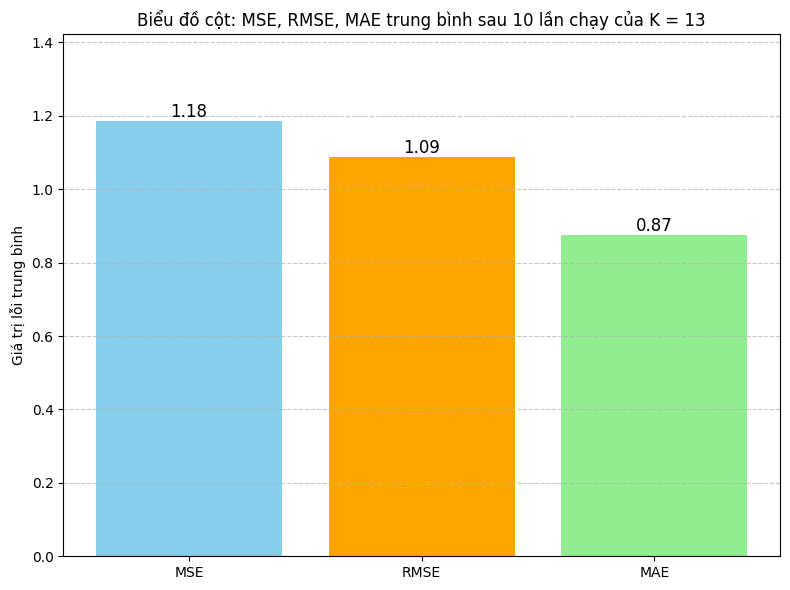

k = 13
Train Time: 0.1780921459197998
Test Time: 0.434358549118042
Trung binh: RMSE = 1.0884 | MAE = 0.8747 | MSE = 1.1846


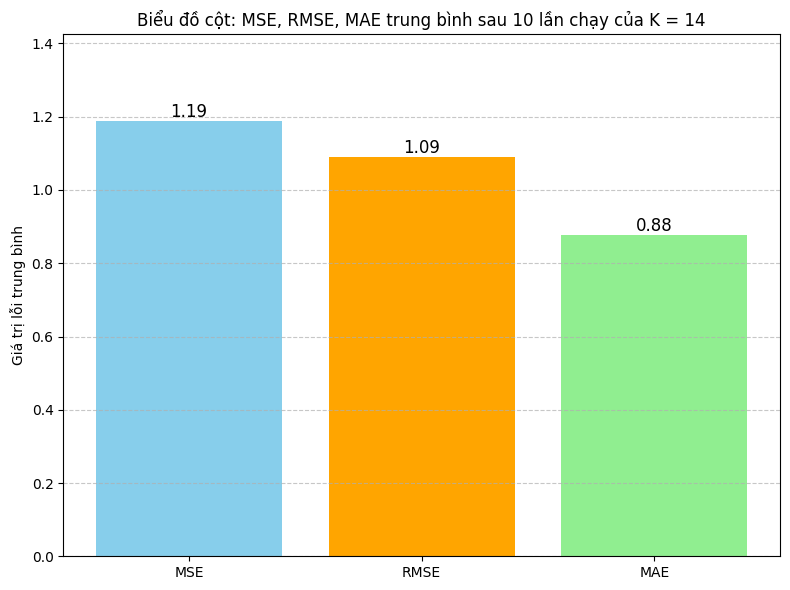

k = 14
Train Time: 0.11018495559692383
Test Time: 0.2458176612854004
Trung binh: RMSE = 1.0896 | MAE = 0.8758 | MSE = 1.1873


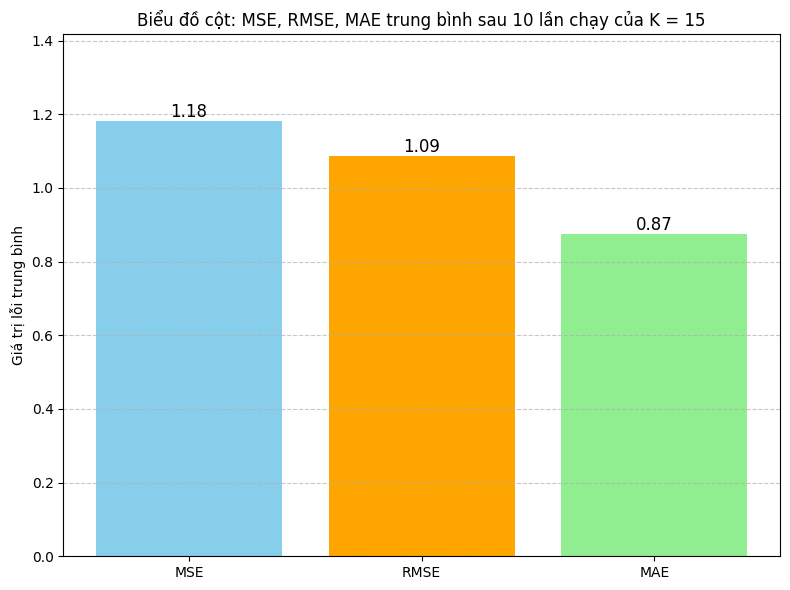

k = 15
Train Time: 0.14982163906097412
Test Time: 0.30644984245300294
Trung binh: RMSE = 1.0865 | MAE = 0.8738 | MSE = 1.1805


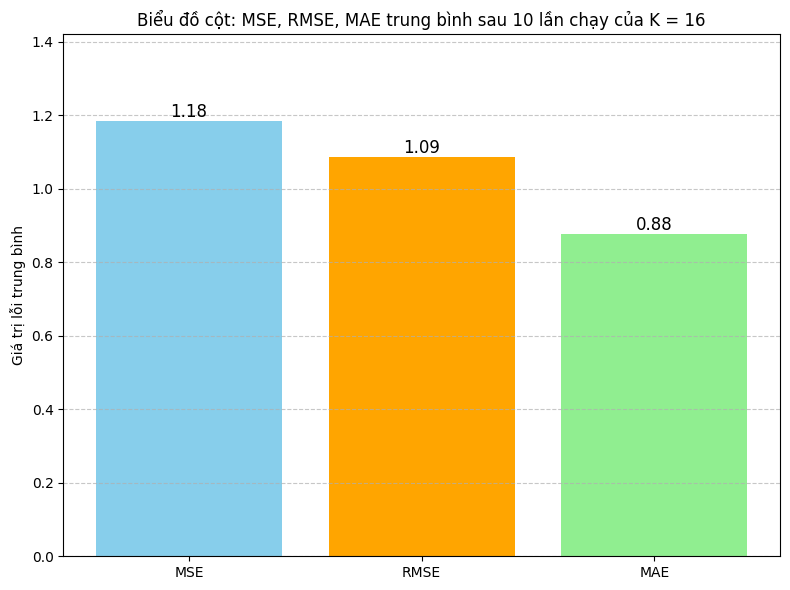

k = 16
Train Time: 0.12685236930847169
Test Time: 0.24824063777923583
Trung binh: RMSE = 1.0880 | MAE = 0.8760 | MSE = 1.1838


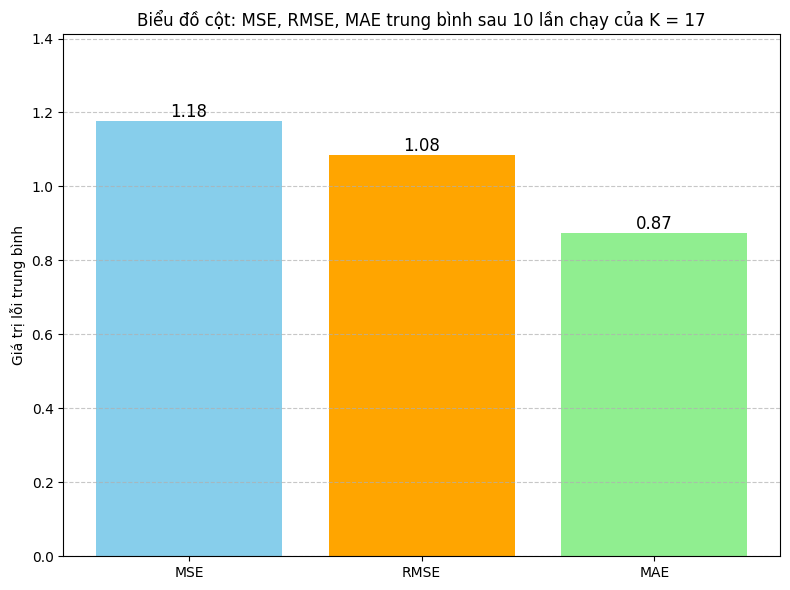

k = 17
Train Time: 0.10644021034240722
Test Time: 0.2083498477935791
Trung binh: RMSE = 1.0844 | MAE = 0.8733 | MSE = 1.1759


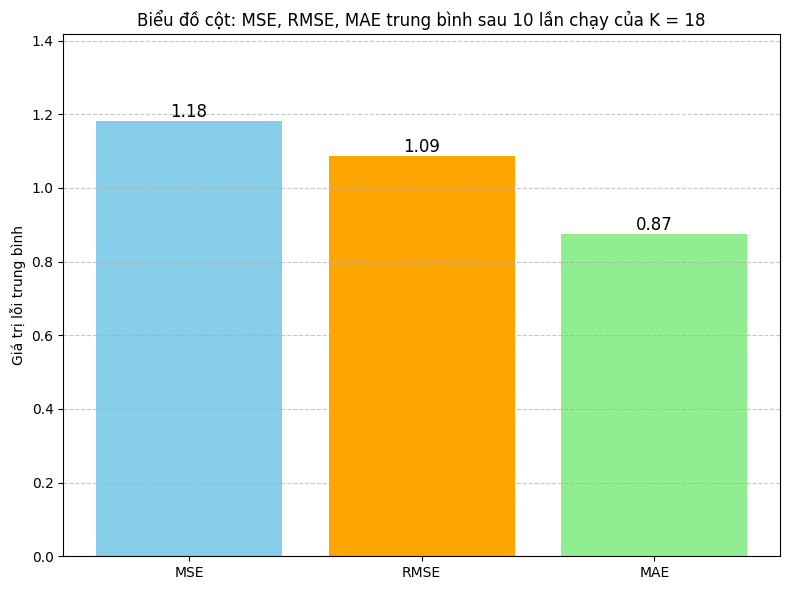

k = 18
Train Time: 0.4004894971847534
Test Time: 1.050153422355652
Trung binh: RMSE = 1.0865 | MAE = 0.8748 | MSE = 1.1806


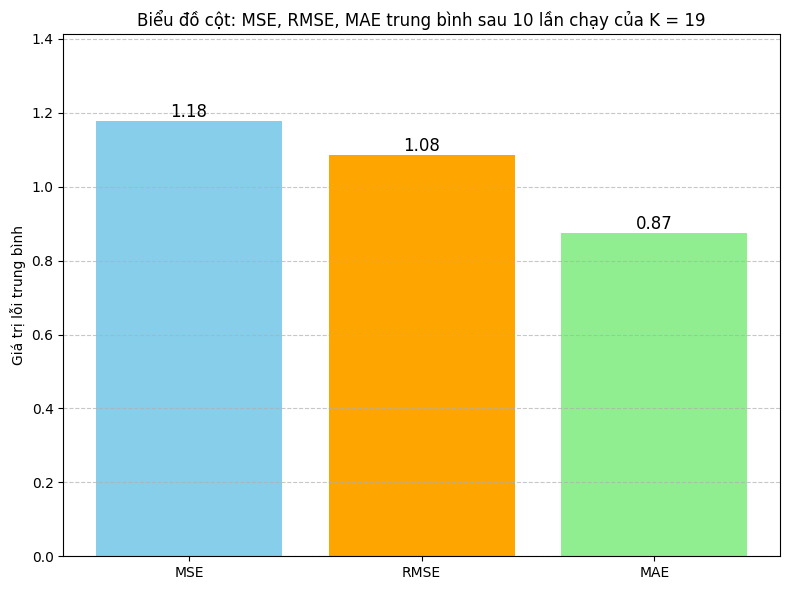

k = 19
Train Time: 0.3590229511260986
Test Time: 1.1054539680480957
Trung binh: RMSE = 1.0848 | MAE = 0.8736 | MSE = 1.1767


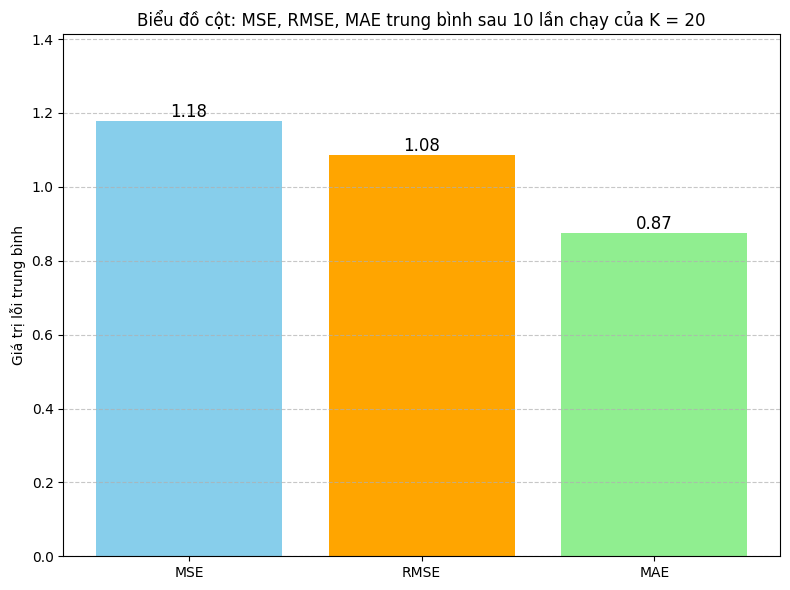

k = 20
Train Time: 0.26746981143951415
Test Time: 0.5834906339645386
Trung binh: RMSE = 1.0850 | MAE = 0.8738 | MSE = 1.1772


In [15]:
import time
results = []
for k_neighbor in range(1, 21):
    time_train = []
    time_test = []
    rmse_list = []
    mae_list = []
    mse_list = []
    for each in range(1, 11):  # Chạy 10 lần thử nghiệm
        combined = list(zip(X.values, y.values))
        # combined = list(zip(X, y))
        random.shuffle(combined)
        dulieu_X_shuffled, dulieu_Y_shuffled = zip(*combined)
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled, dulieu_Y_shuffled, test_size=1/3, random_state=125)

        # Huấn luyện mô hình KNN
        st = time.time()
        model = KNeighborsRegressor(n_neighbors=k_neighbor)
        model.fit(X_Train, Y_Train)
        et = time.time() - st
        time_train.append(et)

        # Dự đoán và tính toán thời gian
        st = time.time()
        Y_Pred = model.predict(X_Test)
        et = time.time() - st
        time_test.append(et)

      
        knn_mse = mean_squared_error(Y_Test, Y_Pred)
        mse_list.append(knn_mse)
        knn_rmse = np.sqrt(knn_mse)
        rmse_list.append(knn_rmse)
        knn_mae = mean_absolute_error(Y_Test, Y_Pred)
        mae_list.append(knn_mae)
        # print(f"MSE cho k={k_neighbor} là: {knn_mse}")

    # iterations = np.arange(1, 11)
    # plt.figure(figsize=(10, 6))
    # plt.plot(iterations, rmse_list, marker='o', label='RMSE')
    # plt.plot(iterations, mae_list, marker='s', label='MAE')
    # plt.plot(iterations, mse_list, marker='^', label='MSE')
    # plt.xlabel('Lần lặp')
    # plt.ylabel('Giá trị')
    # plt.title('Biểu đồ RMSE, MAE, MSE qua 10 lần lặp của K = '+str(k_neighbor))
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    

    # Tính trung bình thời gian train, test và MSE
    Ketqua_timeTrain = statistics.mean(time_train)
    Ketqua_timeTest = statistics.mean(time_test)

    Ketqua_mse = statistics.mean(mse_list)
    Ketqua_rmse = statistics.mean(rmse_list)
    Ketqua_mae = statistics.mean(mae_list)
    results.append((k_neighbor, Ketqua_mse, Ketqua_rmse, Ketqua_mae))

    # Vẽ biểu đồ cột
    metrics = ['MSE', 'RMSE', 'MAE']
    values = [Ketqua_mse, Ketqua_rmse, Ketqua_mae]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'lightgreen'])

    # Hiển thị giá trị trên đầu cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=12)

    plt.ylabel('Giá trị lỗi trung bình')
    plt.title('Biểu đồ cột: MSE, RMSE, MAE trung bình sau 10 lần chạy của K = '+str(k_neighbor))
    plt.ylim(0, max(values) * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"k = {k_neighbor}")
    print(f"Train Time: {Ketqua_timeTrain}")
    print(f"Test Time: {Ketqua_timeTest}")
    print(f"Trung binh: RMSE = {Ketqua_rmse:.4f} | MAE = {Ketqua_mae:.4f} | MSE = {Ketqua_mse:.4f}")

    



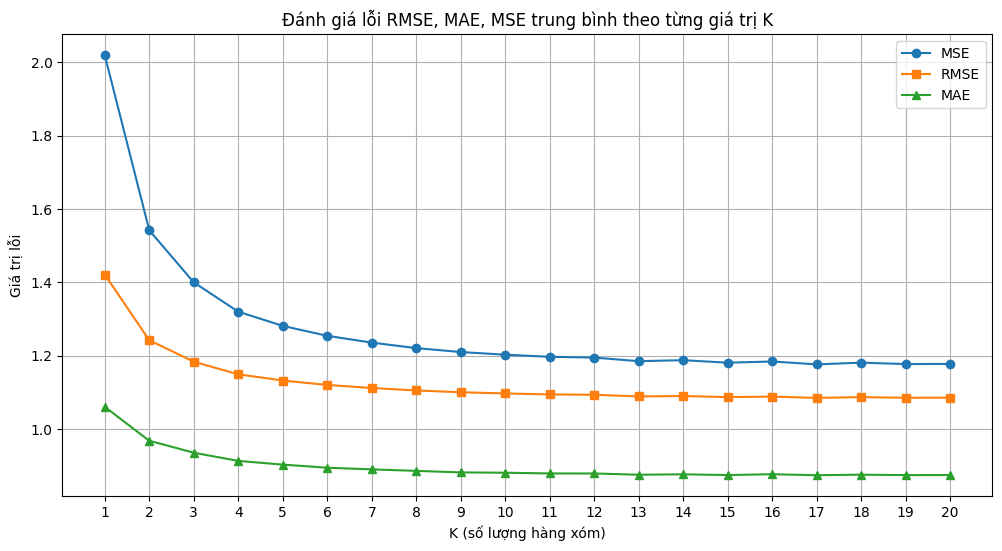

In [16]:

# Tách các giá trị để vẽ biểu đồ
ks = [r[0] for r in results]
mses = [r[1] for r in results]
rmses = [r[2] for r in results]
maes = [r[3] for r in results]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

plt.plot(ks, mses, marker='o', label='MSE')
plt.plot(ks, rmses, marker='s', label='RMSE')
plt.plot(ks, maes, marker='^', label='MAE')

plt.title("Đánh giá lỗi RMSE, MAE, MSE trung bình theo từng giá trị K")
plt.xlabel("K (số lượng hàng xóm)")
plt.ylabel("Giá trị lỗi")
plt.xticks(ks)
plt.grid(True)
plt.legend()
plt.show()


In [17]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Luu mo hinh thanh cong")

Luu mo hinh thanh cong
